## **Activity 10.01 – Normalizing and smoothing data**

1. Use the stocks.csv dataset.
2. Inspect.dtypes and convert dates to pandas datetime if needed.
3. Split the data into train and test sets based on the date, keeping the last 3
months as the test set.
4. Generate a scatter plot that shows the prices over time of different stock symbols
and identifies the train and test splits.
5. You will find that the initial scatter plot isn't very informative, because different
symbols have very different pricing, so some are compressed at the bottom of the
y axis. Plot a histogram of the price distribution for each symbol separately, and use
enough bins to see the detail.
6. Since you see the prices have very different ranges, you need to scale each symbol
separately. Use sklearn's StandardScaler to scale the original price and volume
data by symbol, storing each symbol as a new DataFrame in a list, with scalers as
another list.
7. Plot the train/test data as before, using a loop over the symbols.
8. You can now see that two of the symbols are similar in trend and one differs. Replot
the two similar symbols but apply smoothing of 14 days and compare whether the
two stocks are behaving the same way over the period from 2017-09 forward.

In [1]:
!wget https://raw.githubusercontent.com/PacktWorkshops/The-Pandas-Workshop/master/Chapter10/Datasets/stocks.csv

--2023-07-10 00:04:33--  https://raw.githubusercontent.com/PacktWorkshops/The-Pandas-Workshop/master/Chapter10/Datasets/stocks.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26701 (26K) [text/plain]
Saving to: ‘stocks.csv’

stocks.csv          100%[===================>]  26.08K  --.-KB/s    in 0.001s  

2023-07-10 00:04:34 (17.6 MB/s) - ‘stocks.csv’ saved [26701/26701]



In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
stocks = pd.read_csv('stocks.csv')
stocks.head()
stocks.dtypes

Date          object
Close        float64
Volume         int64
symbol        object
sentiment     object
dtype: object

In [4]:
stocks['Date'] = pd.to_datetime(stocks['Date'])
stocks.head()
stocks.dtypes

Date         datetime64[ns]
Close               float64
Volume                int64
symbol               object
sentiment            object
dtype: object

3. Split the data into train and test sets based on the date, keeping the last 3
months as the test set.

In [5]:
train_end = '2018-01-13'

train = stocks.loc[stocks['Date'] <= train_end, :]
test = stocks.loc[stocks['Date'] > train_end, :]

4. Generate a scatter plot that shows the prices over time of different stock symbols and identifies the train and test splits.

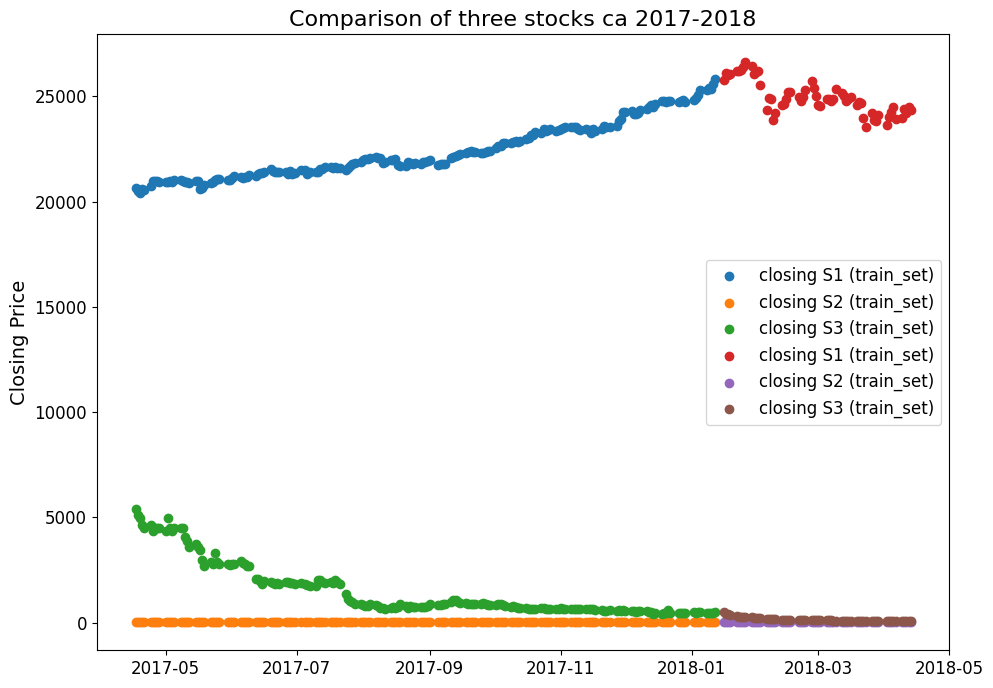

In [6]:
fig, ax = plt.subplots(figsize = (11, 8))

# making different categories
symbols_train = train.groupby('symbol')
symbols_test = test.groupby('symbol')

for train_name, item in symbols_train:
  ax.scatter(item.Date,
             item.Close,
             label = 'closing ' + train_name + ' (train_set)')
for train_name, item in symbols_test:
  ax.scatter(item.Date,
             item.Close,
             label = 'closing ' + train_name + ' (train_set)')

ax.legend(fontsize = 12)
ax.set_ylabel('Closing Price', fontsize = 14)
ax.tick_params(labelsize = 12)
ax.set_title('Comparison of three stocks ca 2017-2018', fontsize = 16)

plt.show()


5. You will find that the initial scatter plot isn't very informative, because different symbols have very different pricing, so some are compressed at the bottom of the y axis. Plot a histogram of the price distribution for each symbol separately, and use enough bins to see the detail.

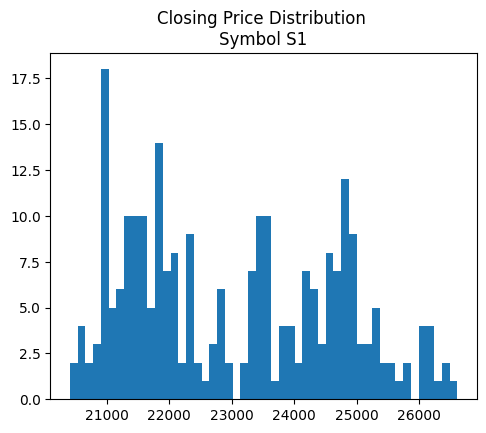

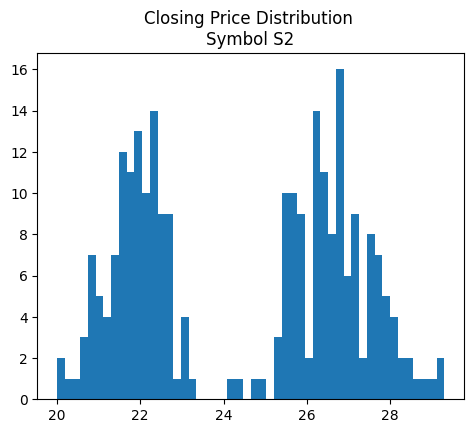

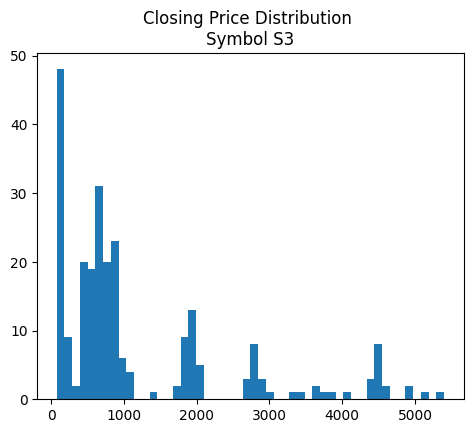

In [7]:
symbols = stocks.symbol.unique()

for i in range(len(symbols)):
  fig, ax = plt.subplots(figsize = (5.5, 4.5))
  ax.hist(stocks.groupby('symbol').get_group(symbols[i])['Close'], bins=50)
  ax.set_title('Closing Price Distribution \nSymbol ' + symbols[i])
  plt.show()

6. Since you see the prices have very different ranges, you need to scale each symbol separately. Use sklearn's StandardScaler to scale the original price and volume data by symbol, storing each symbol as a new DataFrame in a list, with scalers as another list.

In [8]:
# splitting between train/test first, then use a list to store each symbol

scale_cols = ['Close', 'Volume']
scalers = []
scaled_data_list = []

for symbol in range(len(symbols)):
  # scaled data by symbol
  scalers.append(StandardScaler())
  (scaled_data_list.append(stocks.groupby('symbol').
                      get_group(symbols[symbol]).copy()))
  scaled_data_list[symbol].loc[:, scale_cols] = \
    (scalers[symbol].fit_transform(scaled_data_list[symbol].loc[:, scale_cols]))
[data.head() for data in scaled_data_list]


[         Date     Close    Volume symbol sentiment
 0  2017-04-17 -1.469506 -1.175399     S1   NEUTRAL
 3  2017-04-18 -1.538998 -0.840327     S1   NEUTRAL
 6  2017-04-19 -1.611638 -0.528257     S1   NEUTRAL
 9  2017-04-20 -1.505101 -0.354008     S1       POS
 14 2017-04-21 -1.524028  0.210303     S1   NEUTRAL,
          Date     Close    Volume symbol sentiment
 1  2017-04-17 -1.757829  0.198494     S2   NEUTRAL
 4  2017-04-18 -1.699092 -0.359611     S2   NEUTRAL
 7  2017-04-19 -1.640355  0.351069     S2   NEUTRAL
 10 2017-04-20 -1.424984 -0.443929     S2       POS
 12 2017-04-21 -1.483721 -0.259233     S2   NEUTRAL,
          Date     Close    Volume symbol sentiment
 2  2017-04-17  3.342186 -0.211226     S3   NEUTRAL
 5  2017-04-18  3.104449 -0.211226     S3   NEUTRAL
 8  2017-04-19  2.985580 -0.211226     S3   NEUTRAL
 11 2017-04-20  2.747843 -0.211226     S3       NEG
 13 2017-04-21  2.628974 -0.211226     S3   NEUTRAL]

7. Plot the train/test data as before, using a loop over the symbols.

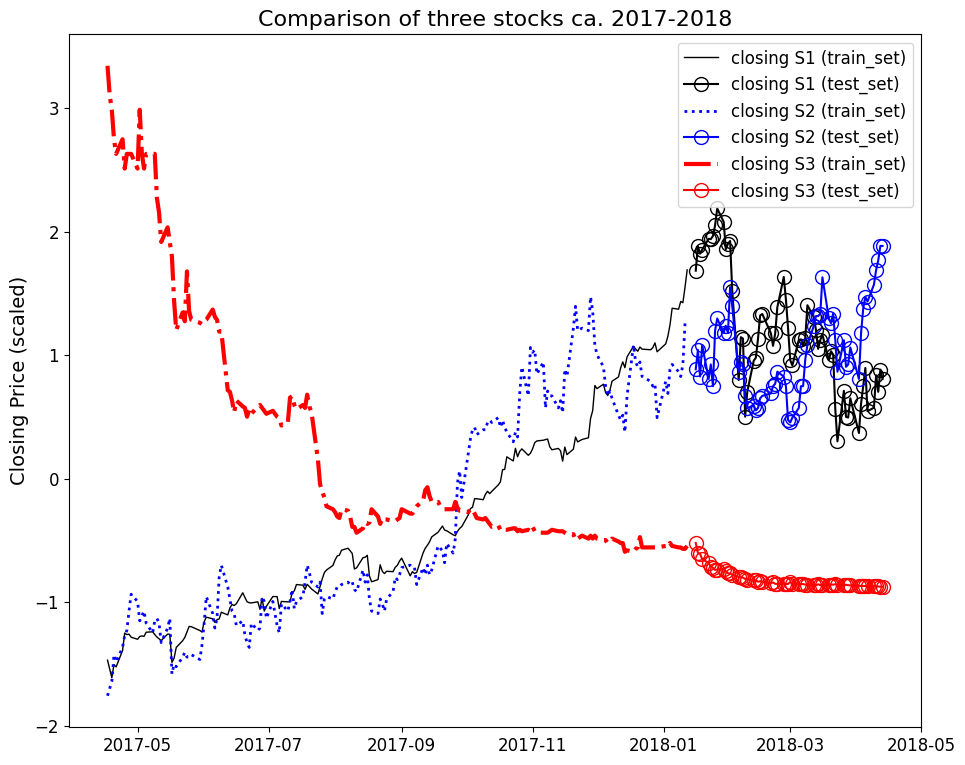

In [9]:
linestyles = ['solid', 'dotted', 'dashdot']
colors = ['black', 'blue', 'red']

figure, ax = plt.subplots(figsize = (11, 9))

for x in range(len(symbols)):

  # split data
  train = (scaled_data_list[x].loc[scaled_data_list[x]['Date'] <= train_end, :])
  test = (scaled_data_list[x].loc[scaled_data_list[x]['Date'] > train_end, :])

  # generate the plots
  ax.plot(train.Date, train.Close,
          linestyle = linestyles[x], lw = x + 1,
          color = colors[x],
          label = 'closing ' + symbols[x] + ' (train_set)')
  ax.plot(test.Date, test.Close, 'o-',
          fillstyle = 'none', markersize = 10,
          color = colors[x],
          label = 'closing ' + symbols[x] + ' (test_set)')

ax.legend(fontsize = 12)
ax.set_ylabel('Closing Price (scaled)', fontsize = 14)
ax.tick_params(labelsize = 12)
ax.set_title('Comparison of three stocks ca. 2017-2018',
             fontsize = 16)
plt.show()

8. You can now see that two of the symbols are similar in trend and one differs. Replot the two similar symbols but apply smoothing of 14 days and compare whether the two stocks are behaving the same way over the period from 2017-09 forward.

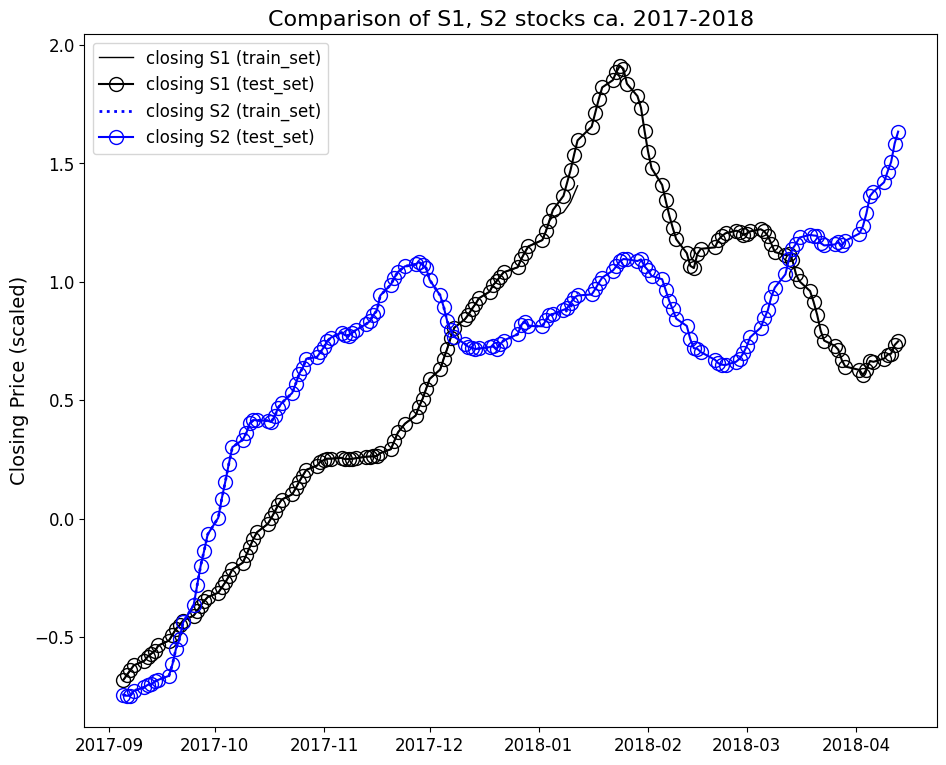

In [10]:
start_date = '2017-09-01'

fig, ax = plt.subplots(figsize = (11, 9))

for x in [0, 1]:
  train = \
    (scaled_data_list[x].copy().
     loc[scaled_data_list[x]['Date'] <= train_end, :])
  train = train.loc[train['Date'] > start_date, :]
  train.Close = train.Close.rolling(window = 14,
                                    min_periods = 0,
                                    center = True).mean()

  test = \
  (scaled_data_list[x].copy().
   loc[scaled_data_list[x]['Date'] > start_date, :])
  test.Close = test.Close.rolling(window = 14,
                                  min_periods = 0,
                                  center = True).mean()

  ax.plot(train.Date, train.Close,
          linestyle = linestyles[x], lw = x + 1,
          c = colors[x],
          label = 'closing ' + symbols[x] + ' (train_set)')
  ax.plot(test.Date, test.Close, 'o-',
          fillstyle = 'none', markersize = 10,
          color = colors[x],
          label = 'closing ' + symbols[x] + ' (test_set)')

ax.legend(fontsize = 12)
ax.set_ylabel('Closing Price (scaled)', fontsize = 14)
ax.tick_params(labelsize = 12)
ax.set_title('Comparison of S1, S2 stocks ca. 2017-2018',
             fontsize = 16)
plt.show()